### Importing  Packages

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df=pd.read_csv('1806039.csv')

In [3]:
df.head(15)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140105686,SYSC corporation,2019-08-08 00:00:00,2019.0,2.960564e+09,2019-07-15,20190715,20190715,20190803.0,CAD,RV,1.0,NaN,82481.08,20190724.0,CA10,2.960564e+09,0
1,U001,0200704858,WAKE us,2019-03-28 00:00:00,2019.0,1.928944e+09,2019-03-12,20190311,20190312,20190327.0,USD,RV,1.0,NaN,96256.92,20190312.0,NAA8,1.928944e+09,0
2,U001,0200726979,BJ'S associates,2019-03-18 00:00:00,2019.0,1.928881e+09,2019-03-01,20190301,20190301,20190316.0,USD,RV,1.0,NaN,1421.63,20190301.0,NAA8,1.928881e+09,0
3,U001,0200078795,H T H systems,2019-01-18 00:00:00,2019.0,1.928554e+09,2019-01-02,20190102,20190102,20190117.0,USD,RV,1.0,NaN,1609.56,20190102.0,NAA8,1.928554e+09,0
4,U001,0200778870,C trust,2019-09-10 00:00:00,2019.0,1.929775e+09,2019-08-23,20190822,20190823,20190907.0,USD,RV,1.0,NaN,11948.84,20190823.0,NAA8,1.929775e+09,0
5,U001,0200749225,SUPER foundation,2019-05-10 00:00:00,2019.0,1.929207e+09,2019-04-25,20190425,20190425,20190510.0,USD,RV,1.0,NaN,21344.58,20190425.0,NAA8,1.929207e+09,0
6,U001,0200726979,BJ'S co,2019-11-07 00:00:00,2019.0,1.930043e+09,2019-10-23,20191022,20191023,20191107.0,USD,RV,1.0,NaN,395.38,20191023.0,NAA8,1.930043e+09,0
7,CA02,0140104340,COLABOR llc,2019-10-31 00:00:00,2019.0,2.960584e+09,2019-10-09,20191009,20191009,20191020.0,CAD,RV,1.0,NaN,13077.52,20191010.0,CA10,2.960584e+09,0
8,U001,0200762301,C&S WH us,2019-04-29 00:00:00,2019.0,1.929140e+09,2019-04-12,20190412,20190412,20190427.0,USD,RV,1.0,NaN,108283.42,20190412.0,NAC6,1.929140e+09,0
9,U001,0200744019,TARG us,2020-02-20 00:00:00,2020.0,1.930494e+09,2020-02-08,20200207,20200208,20200223.0,USD,RV,1.0,NaN,19255.94,20200208.0,NAA8,1.930494e+09,0


In [4]:
#Columns in our Data
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [5]:
#Shape of our Data
df.shape

(50000, 19)

In [6]:
df['cust_number'].count()

50000

In [7]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

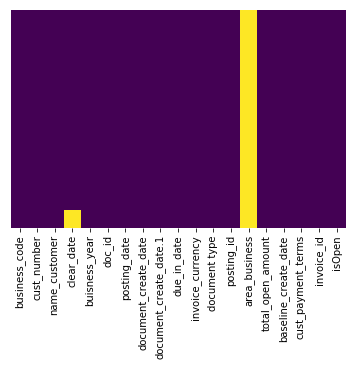

In [8]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis")

### Slicing out the records with Clearing date Null into a separate DataFrame.We name this data frame as untouched_df we would not use it for preprocessing

In [9]:
#untouched is the variable having the rows where clear dates are null,as we were instructed
untouched=df[df['clear_date'].isna()]
untouched.head()
untouched.shape

(3853, 19)

### Drop Those Records from original where clear_date is NULL .We store this in df1

In [10]:
df1=df

In [11]:
df1 = df1.dropna(axis=0, subset=['clear_date'])
df1.head()
df1.shape

(46147, 19)

In [12]:
df1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Data Preprocessing

In [13]:
df1.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,46147.000000,4.614700e+04,4.614700e+04,4.614700e+04,4.614700e+04,46147.0,0.0,46147.000000,4.614700e+04,4.613900e+04,46147.0
mean,2019.131775,2.011625e+09,2.019179e+07,2.019182e+07,2.019199e+07,1.0,NaN,32266.441757,2.019182e+07,2.010327e+09,0.0
std,0.338249,2.923960e+08,3.234623e+03,3.225822e+03,3.276714e+03,0.0,NaN,39918.730252,3.230241e+03,2.752915e+08,0.0
min,2019.000000,1.928502e+09,2.018123e+07,2.018122e+07,2.018080e+07,1.0,NaN,1.040000,2.018072e+07,1.928502e+09,0.0
25%,2019.000000,1.929177e+09,2.019041e+07,2.019041e+07,2.019043e+07,1.0,NaN,4603.400000,2.019041e+07,1.929177e+09,0.0
50%,2019.000000,1.929726e+09,2.019072e+07,2.019072e+07,2.019081e+07,1.0,NaN,17261.620000,2.019072e+07,1.929726e+09,0.0
75%,2019.000000,1.930204e+09,2.019103e+07,2.019103e+07,2.019112e+07,1.0,NaN,47255.085000,2.019103e+07,1.930204e+09,0.0
max,2020.000000,9.500000e+09,2.020023e+07,2.020023e+07,2.020062e+07,1.0,NaN,729645.920000,2.020031e+07,2.960617e+09,0.0


### As we will be performing operations like Sorting,Calculating delay and many other similar operation on dates later in this notebook so we convert all dates to datetime format

In [14]:
df1['document_create_date']=pd.to_datetime(df1['document_create_date'].astype('float'),format='%Y%m%d')
df1['document_create_date.1']=pd.to_datetime(df1['document_create_date.1'].astype('float'),format='%Y%m%d')
df1['baseline_create_date']=pd.to_datetime(df1['baseline_create_date'].astype('float'),format='%Y%m%d')
df1['due_in_date']=pd.to_datetime(df1['due_in_date'].astype('float'),format='%Y%m%d')

In [15]:
from datetime import datetime
from datetime import timedelta
#clear date's type is string so it would be convenient for us to convert it into a similar format as other date cloumns
df1['clear_date'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df1['clear_date']]
#datetime.strptime(x, '%Y-%m-%d %H:%M:%S') used to create datetime object

In [16]:
df1['invoice_id'].isna().value_counts()

False    46139
True         8
Name: invoice_id, dtype: int64

#### We are getting 8 NaN values for invoice id i.e unquie number assigned when a seller creates invoice, since invoice id is not given maybe these records are unsuited,therefore I am removing it

In [17]:
df1.head()
df1.shape

(46147, 19)

In [18]:
#It is not practically possible that a invoice payment is cleared without creation of the document,but we do not have any case like that
df1[df1['clear_date']<df1['document_create_date.1']].shape

(0, 19)

In [19]:
#It cannot be a case that invoice payment is cleared before baseline_create_date
df1[df1['clear_date']<df1['baseline_create_date']].shape

(7, 19)

In [20]:
#It is not possible that due_date is decided prior to creation of document.
df1[df1['due_in_date']<df1['document_create_date.1']].shape

(109, 19)

In [21]:
#It cannot be possible that due_in_date is decided prior baseline_create_date(the date from which companies Terms and Conditions get operational)
df1[df1['due_in_date']<df1['baseline_create_date']].shape

(0, 19)

In [22]:
df1[df1["total_open_amount"]==0].shape

(0, 19)

### Handling Anamolies

In [23]:
df1 = df1.dropna(axis=0, subset=['invoice_id'])
df1=df1.drop(index=df1[df1['clear_date']<df1['document_create_date.1']].index)
df1=df1.drop(index=df1[df1['clear_date']<df1['baseline_create_date']].index)
df1=df1.drop(index=df1[df1['due_in_date']<df1['document_create_date.1']].index)
df1=df1.drop(index=df1[df1['due_in_date']<df1['baseline_create_date']].index)

In [24]:
df1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140105686,SYSC corporation,2019-08-08,2019.0,2.960564e+09,2019-07-15,2019-07-15,2019-07-15,2019-08-03,CAD,RV,1.0,NaN,82481.08,2019-07-24,CA10,2.960564e+09,0
1,U001,0200704858,WAKE us,2019-03-28,2019.0,1.928944e+09,2019-03-12,2019-03-11,2019-03-12,2019-03-27,USD,RV,1.0,NaN,96256.92,2019-03-12,NAA8,1.928944e+09,0
2,U001,0200726979,BJ'S associates,2019-03-18,2019.0,1.928881e+09,2019-03-01,2019-03-01,2019-03-01,2019-03-16,USD,RV,1.0,NaN,1421.63,2019-03-01,NAA8,1.928881e+09,0
3,U001,0200078795,H T H systems,2019-01-18,2019.0,1.928554e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,RV,1.0,NaN,1609.56,2019-01-02,NAA8,1.928554e+09,0
4,U001,0200778870,C trust,2019-09-10,2019.0,1.929775e+09,2019-08-23,2019-08-22,2019-08-23,2019-09-07,USD,RV,1.0,NaN,11948.84,2019-08-23,NAA8,1.929775e+09,0


In [25]:
df1.shape

(46023, 19)

In [26]:
df_unique = df1.nunique().to_frame().reset_index() # to_frame()function is used to convert the given series object to a dataframe.
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)

                  Variable  DistinctCount
0            business_code              6
1              cust_number           1387
2            name_customer           4162
3               clear_date            402
4            buisness_year              2
5                   doc_id          46023
6             posting_date            424
7     document_create_date            426
8   document_create_date.1            424
9              due_in_date            488
10        invoice_currency              2
11           document type              1
12              posting_id              1
13           area_business              0
14       total_open_amount          41637
15    baseline_create_date            430
16      cust_payment_terms             72
17              invoice_id          46023
18                  isOpen              1


#### Dropping Constant Columns

In [27]:
#since all these columns have only one value so it can be dropped
df1.drop(["document type"],axis=1,inplace=True)
df1.drop(["posting_id"],axis=1,inplace=True)
df1.drop(["isOpen"],axis=1,inplace=True)

##### Dropping area bussiness as its NULL for all rows

In [28]:
df1.drop(["area_business"],axis=1,inplace=True)

#### For all the rows doc_id is same as invoice_id also they are unique so we must remove it else model may overfit on these unique values

In [29]:
df1[df1['doc_id']==df1['invoice_id']]['doc_id'].count()

46023

In [30]:
df1.drop(["doc_id"],axis=1,inplace=True)
df1.drop(["invoice_id"],axis=1,inplace=True)

#### The column business_year column has only 2 disticnt values and also it can be extracted from the any other date-column so dropping it for now 

In [31]:
df1.drop(["buisness_year"],axis=1,inplace=True)

### Calculating  Delay


In [32]:
df1['delay']=(df1['clear_date']-df1['due_in_date']).dt.days

In [33]:
df1[df1['delay']<0]['delay'].count() #Number of Records Where delay is less than 0 ie Payment has been cleared before due_date 

16973

In [34]:
df1['delay']

c=0
for x in df1["delay"]:
    if x<0:
        c=c+1
print(c)

16973


In [35]:
df1.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,CA02,0140105686,SYSC corporation,2019-08-08,2019-07-15,2019-07-15,2019-07-15,2019-08-03,CAD,82481.08,2019-07-24,CA10,5
1,U001,0200704858,WAKE us,2019-03-28,2019-03-12,2019-03-11,2019-03-12,2019-03-27,USD,96256.92,2019-03-12,NAA8,1
2,U001,0200726979,BJ'S associates,2019-03-18,2019-03-01,2019-03-01,2019-03-01,2019-03-16,USD,1421.63,2019-03-01,NAA8,2
3,U001,0200078795,H T H systems,2019-01-18,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,1609.56,2019-01-02,NAA8,1
4,U001,0200778870,C trust,2019-09-10,2019-08-23,2019-08-22,2019-08-23,2019-09-07,USD,11948.84,2019-08-23,NAA8,3


### Sort According To document_create_date.1 

In [36]:
df1.sort_values(by='document_create_date.1',inplace=True)


In [37]:
df1['document_create_date.1'].max(),df1['document_create_date.1'].min()

#Our maximum value of Document create date 1 is 2020-02-27 and min is 2018-12-30

(Timestamp('2020-02-27 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [38]:
df1.tail()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
44470,U001,0200759878,SA associates,2020-03-13,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,3396.48,2020-02-27,NAH4,0
16100,CA02,0140104409,LOB llc,2020-03-13,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,170096.04,2020-02-28,CA10,4
13920,U001,0200126819,MCLANE in,2020-03-18,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,17304.60,2020-02-27,NAA8,5
43747,CA02,0140106408,WAL-M corp,2020-03-16,2020-02-27,2020-02-28,2020-02-27,2020-03-10,CAD,63115.56,2020-02-29,CA10,6
4370,U001,0200759878,SA in,2020-03-16,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,13750.69,2020-02-27,NAH4,3


In [39]:
df1.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
14405,U001,0200769623,WAL-MAR foundation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,31886.14,2018-12-30,NAH4,-4
34210,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,NAH4,-3
5752,U001,0200769623,WAL-MAR us,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,16358.52,2018-12-30,NAH4,1
5011,U001,0200726979,BJ'S systems,2019-01-22,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,16515.44,2018-12-30,NAA8,8
15869,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,11025.27,2018-12-30,NAH4,-5


### Train_Test_Validation Split

In [40]:
df1.shape

(46023, 13)

In [41]:
x = datetime(2019,11,9)  #11 september 2019

In [42]:
c=0
for i in df1["document_create_date.1"]:
    if i<=x:
        c=c+1
print(c)


35891


In [43]:
df_train=df1[df1["document_create_date.1"]<='2019-11-9'] 
df_train.tail()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
14458,U001,CCU013,KRAFT F co,2019-12-20,2019-11-09,2019-11-05,2019-11-09,2019-11-09,USD,302.02,2019-11-09,NAX2,41
11716,U001,0200455322,PEA llc,2019-12-12,2019-11-09,2019-11-08,2019-11-09,2019-12-09,USD,48416.49,2019-11-09,NAD5,3
31972,U001,0200769623,WAL-MAR foundation,2019-11-26,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,19204.16,2019-11-09,NAH4,2
16124,U001,0200726979,BJ'S in,2019-11-25,2019-11-09,2019-11-12,2019-11-09,2019-11-24,USD,349.03,2019-11-09,NAA8,1
35161,U001,0200769623,WAL-MAR us,2019-11-26,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,280.67,2019-11-09,NAH4,2


In [44]:
df_rest=df1[df1["document_create_date.1"]>'2019-11-9']
df_rest.shape

(10132, 13)

In [45]:
p =datetime(2020,1,8)
c=0
for i in df_rest["document_create_date.1"]:
    if i<=p:
        c=c+1
print(c)

5038


In [46]:
df_val=df_rest[df_rest["document_create_date.1"]<='2020-1-8']
df_val.shape

(5038, 13)

In [47]:
df_test=df_rest[df_rest["document_create_date.1"]>'2020-1-8']
df_test.shape

(5094, 13)

### Exploratory Data Analysis

Text(0, 0.5, 'total_open_amount')

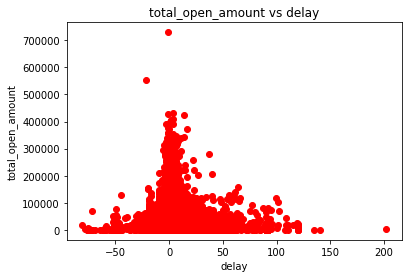

In [48]:
plt.scatter(df_train['delay'],df_train['total_open_amount'],color='red')
plt.title("total_open_amount vs delay")
plt.xlabel("delay")
plt.ylabel("total_open_amount")

#### JUST TO OBSERVE SOME OUTLIERS OF DELAY WRT TOTAL OPEN AMOUNT

In [49]:
print(df_train[df_train["total_open_amount"]>500000].shape)
print(df_train[df_train["delay"]>125].shape)

(2, 13)
(3, 13)


In [50]:
#Dropping these rows as these are outlier as we observed from above graph
df_train=df_train.drop(index=df_train[df_train['total_open_amount']>500000].index)
df_train=df_train.drop(index=df_train[df_train['delay']>125].index)
df_train=df_train.drop(index=df_train[df_train['delay']==-120].index)

Text(0, 0.5, 'total_open_amount')

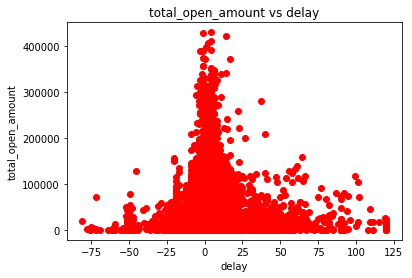

In [52]:
#After Removing Outliers
plt.scatter(df_train['delay'],df_train['total_open_amount'],color='red')
plt.title("total_open_amount vs delay")
plt.xlabel("delay")
plt.ylabel("total_open_amount")

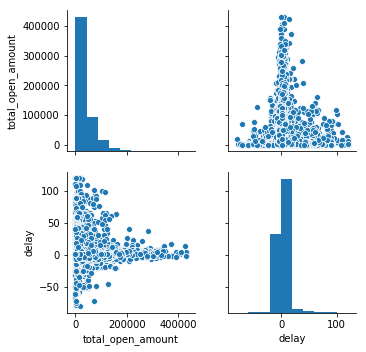

In [53]:
sns.pairplot(df_train,palette="husl")
plt.rcParams['figure.figsize']=(10,10)

#### Total_open_amount is highly influencing our target "delay"

### Let's See How many people pay there invoice payment before or by the the due date and how many people give late payment

In [96]:
df_train_copy=df_train.copy()

In [97]:
df_train_copy.loc[df_train_copy['delay']<=0,'Late'] = 0
df_train_copy.loc[df_train_copy['delay']>0,'Late'] = 1

In [98]:
df_train_copy[df_train_copy['Late']==0]['Late'].count(),df_train_copy[df_train_copy['Late']==1]['Late'].count()

#Here 20642 compoanies clear there invoice either on or before due date
#Here 15249 companies do not clear there invoce on time

(20640, 15246)

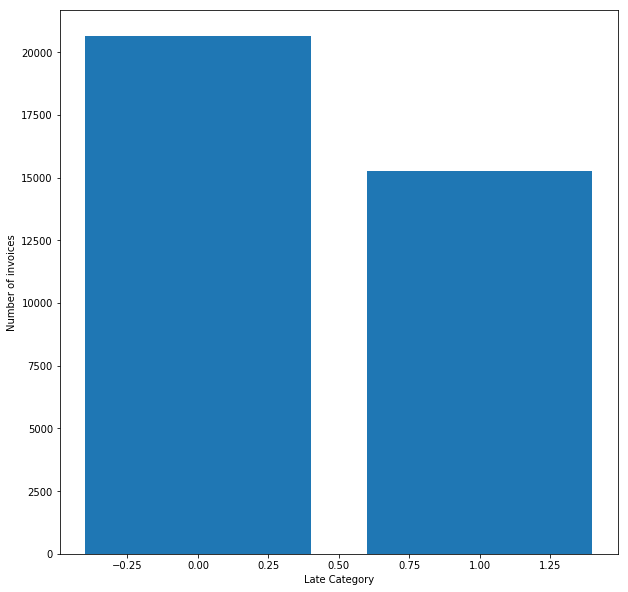

In [99]:
category_count=df_train_copy.groupby('Late').count().sort_values(by='cust_number', ascending=False)
plt.bar(category_count.index.values, category_count['cust_number'])
plt.xlabel('Late Category')
plt.ylabel('Number of invoices')
plt.show()

#### Analysing Categorical Columns

<Figure size 1440x360 with 0 Axes>

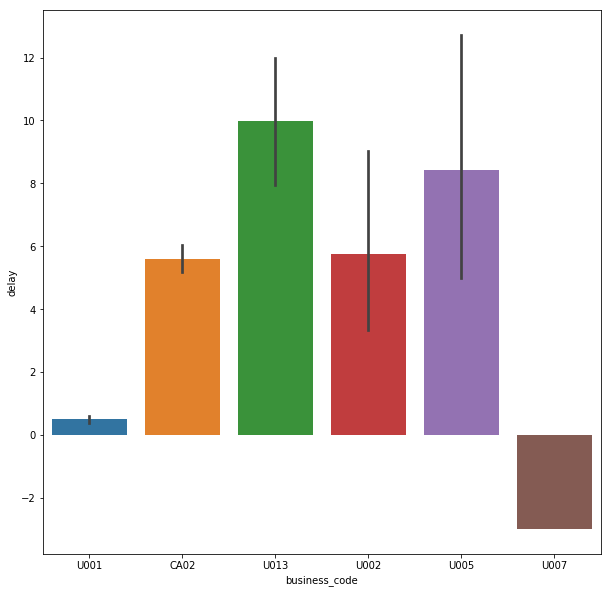

<Figure size 1440x360 with 0 Axes>

In [100]:
#To see if any relation is between assigning business_code wrt delay
sns.barplot(x='business_code',y="delay",data = df_train)
plt.rcParams['figure.figsize']=(5,4)
plt.figure(figsize=(20,5))


#### Invoice_currency is highly biased towards USD currency ,hence we should drop these columns as it may effect final results 

In [101]:
df_train['invoice_currency'].value_counts()

USD    33098
CAD     2788
Name: invoice_currency, dtype: int64

In [102]:
df_train['document_create_date.1'].nunique()

315

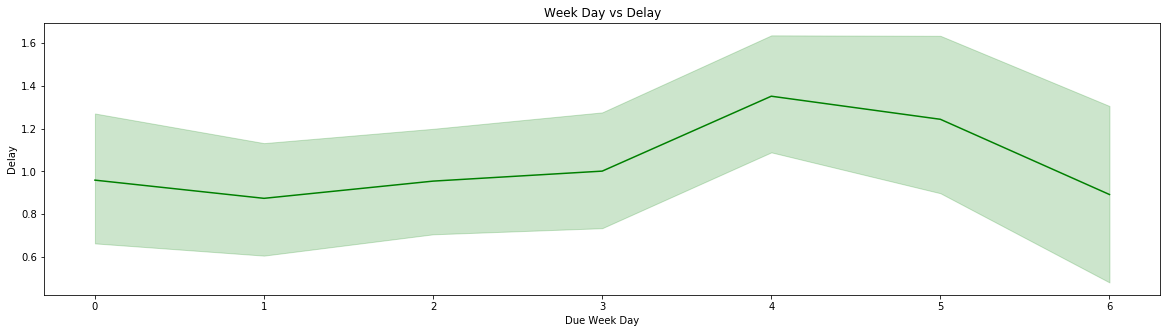

In [103]:
plt.figure(figsize=(20,5))
sns.lineplot(df_train['document_create_date.1'].dt.dayofweek, df_train['delay'],color='green')
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

### Delays are maximum on 4th day of week and eventually delays reduces as week days pass by 6th day it reduces sharply

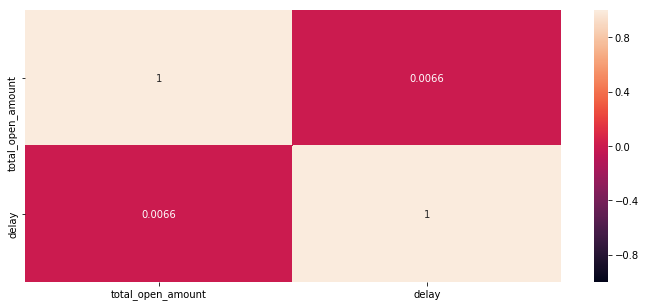

In [104]:
correlation = df_train.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1)

In [73]:
correlation['delay'].sort_values(ascending=False)

delay                1.000000
total_open_amount    0.006562
Name: delay, dtype: float64

In [74]:
df_unique = df_train.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)

                  Variable  DistinctCount
0            business_code              6
1              cust_number           1299
2            name_customer           3725
3               clear_date            294
4             posting_date            315
5     document_create_date            320
6   document_create_date.1            315
7              due_in_date            356
8         invoice_currency              2
9        total_open_amount          32673
10    baseline_create_date            324
11      cust_payment_terms             68
12                   delay            169


### Groupby name of customer and the delay they made

In [75]:
map_cust=df_train.groupby('name_customer')['delay'].mean().to_dict()
map_cust

{'10167 co': 5.0,
 '10167 corporation': -3.0,
 '10167 llc': -1.0,
 '11-17  ': 14.0,
 '113712 CA co': -10.0,
 '17135 associates': 2.0,
 '17135 corporation': -2.0,
 '17135 llc': 0.0,
 '7 ELEVE ': 6.0,
 '99 CE ': 1.0,
 '99 CE associates': 1.6666666666666667,
 '99 CE co': 1.0,
 '99 CE corp': 26.25,
 '99 CE corporation': 3.0,
 '99 CE foundation': 1.0,
 '99 CE in': 1.0,
 '99 CE llc': 4.666666666666667,
 '99 CE systems': 1.5,
 '99 CE trust': 1.0,
 '99 CE us': 2.0,
 'A & W F associates': 8.0,
 'A & W F co': 5.0,
 'A & W F corp': 2.0,
 'A & W F corporation': 1.6666666666666667,
 'A & W F foundation': 2.0,
 'A & W F in': 1.0,
 'A & W F systems': 4.666666666666667,
 'A & W F trust': 0.5,
 'A & W F us': 6.0,
 'ACE  systems': 5.0,
 'ACE  trust': 0.0,
 'AFFI ': -5.0,
 'AFFI associates': -4.333333333333333,
 'AFFI co': -9.5,
 'AFFI corp': -6.0,
 'AFFI corporation': -7.0,
 'AFFI foundation': -5.0,
 'AFFI llc': -5.0,
 'AFFI us': -6.0,
 'AFFILI associates': -38.0,
 'AFFILI co': -23.75,
 'AFFILI corporat

### Groupby name of customer number and the delay they made¶

In [76]:
map_cust_num=df_train.groupby("cust_number")['delay'].mean().to_dict()
map_cust_num

{'0100000048': 24.5,
 '0100000051': -1.0,
 '0100000158': 28.285714285714285,
 '0100000217': -2.8,
 '0100000222': -4.233333333333333,
 '0100000272': 5.0,
 '0100000525': 61.0,
 '0100000533': -10.75,
 '0100000564': 33.0,
 '0100000582': -8.0,
 '0100000933': -7.0,
 '0100001196': 2.986111111111111,
 '0100001222': 2.0,
 '0100001659': -21.0,
 '0100003581': -1.0,
 '0100003940': 5.666666666666667,
 '0100004317': 1.0,
 '0100004335': 0.0,
 '0100004536': -8.625,
 '0100004744': 0.0,
 '0100006176': 4.0,
 '0100006311': -1.4444444444444444,
 '0100006671': -2.0,
 '0100006823': -2.0,
 '0100006871': -2.0,
 '0100007544': 32.0,
 '0100007796': 1.0,
 '0100007916': -24.0,
 '0100008001': -3.6,
 '0100008347': 2.0,
 '0100009866': 5.0,
 '0100009932': 5.875,
 '0100009983': -3.0,
 '0100010082': -30.0,
 '0100010183': 3.0,
 '0100010265': 3.0,
 '0100011023': 0.0,
 '0100011571': -14.0,
 '0100011799': 1.0,
 '0100011895': 1.0,
 '0100011958': 1.2142857142857142,
 '0100012006': 9.0,
 '0100012023': -36.0,
 '0100012482': -2.0

### Groupby business code and the delay they made¶¶

In [ ]:
HERE GROUPING IS DONE ON BASES OF BUSINESS CODE AND THEN DELAY MEAN IS CALCULATED TO MAKE A MAP OBJECT WHICH WILL BE LATER USED TO CREATE FEATURES

In [77]:
map_buss=df_train.groupby("business_code")['delay'].mean().to_dict()
map_buss

{'CA02': 5.608680057388809,
 'U001': 0.49798542121612893,
 'U002': 5.76,
 'U005': 8.428571428571429,
 'U007': -3.0,
 'U013': 9.972746331236896}

In [ ]:
HERE GROUPING IS DONE ON BASES OF CUSTOMER PAYMENT TERMS AND THEN DELAY MEAN IS CALCULATED TO MAKE A MAP OBJECT WHICH WILL BE LATER USED TO CREATE FEATURES

In [78]:
map_terms=df_train.groupby("cust_payment_terms")['delay'].mean().to_dict()
map_terms

{'B052': 7.5,
 'B112': 1.0,
 'BR12': -0.5,
 'BR56': 5.0,
 'C106': 5.25,
 'CA10': 5.701838235294118,
 'CA30': -5.354838709677419,
 'CA60': -1.0,
 'CAB1': 6.0,
 'CAX2': 91.0,
 'NA10': 3.449826989619377,
 'NA24': -36.0,
 'NA25': 0.0,
 'NA31': -5.0,
 'NA32': -2.786476868327402,
 'NA38': 1.2777777777777777,
 'NA3B': -7.027027027027027,
 'NA3F': 8.11111111111111,
 'NA84': -4.4375,
 'NA8Q': -3.8,
 'NA9X': -5.333333333333333,
 'NAA8': 1.3661452284992144,
 'NAAW': -14.550898203592814,
 'NAAX': -0.00718562874251497,
 'NAB1': 4.9375,
 'NABD': 7.0,
 'NABG': -9.2,
 'NAC6': 0.4983164983164983,
 'NACB': 5.892857142857143,
 'NAD1': -0.031988873435326845,
 'NAD4': -2.375,
 'NAD5': 9.114285714285714,
 'NAD8': 1.0,
 'NAG2': 8.524011299435028,
 'NAGD': -12.407849829351536,
 'NAH4': -1.7146543382431996,
 'NAM1': 1.5378787878787878,
 'NAM2': -1.1357702349869452,
 'NAM3': 7.0,
 'NAM4': -7.379853095487933,
 'NANC': 3.0,
 'NATJ': 1.0,
 'NATK': 2.0,
 'NATL': 15.0,
 'NATM': 1.0,
 'NATU': 1.0,
 'NATV': 1.0,
 'NAT

In [82]:
df_train['map_cust_mean']=df_train['name_customer'].map(map_cust)
df_train['map_cust_num_mean']=df_train['cust_number'].map(map_cust_num)
df_train['buss_code_mean']=df_train['business_code'].map(map_buss)
df_train['Cust_terms_mean']=df_train['cust_payment_terms'].map(map_terms)
df_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,map_cust_mean,map_cust_num_mean,buss_code_mean,Cust_terms_mean
14405,U001,0200769623,WAL-MAR foundation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,31886.14,2018-12-30,NAH4,-4,-1.982074,-2.041731,0.497985,-1.714654
34210,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,NAH4,-3,-1.941330,-2.041731,0.497985,-1.714654
5752,U001,0200769623,WAL-MAR us,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,16358.52,2018-12-30,NAH4,1,-2.011524,-2.041731,0.497985,-1.714654
5011,U001,0200726979,BJ'S systems,2019-01-22,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,16515.44,2018-12-30,NAA8,8,0.960630,0.926145,0.497985,1.366145
15869,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,11025.27,2018-12-30,NAH4,-5,-2.156969,-2.041731,0.497985,-1.714654
28923,U001,0200769623,WAL-MAR foundation,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,8286.44,2018-12-30,NAH4,-5,-1.982074,-2.041731,0.497985,-1.714654
45003,U001,0200769623,WAL-MAR systems,2019-01-09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,8377.16,2018-12-30,NAH4,-5,-2.270754,-2.041731,0.497985,-1.714654
24512,U001,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,42106.09,2018-12-30,NAH4,-5,-1.884146,-2.041731,0.497985,-1.714654
2851,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20417.83,2018-12-30,NAH4,-5,-2.024000,-2.041731,0.497985,-1.714654
2697,U001,0200769623,WAL-MAR us,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,344.01,2018-12-30,NAH4,1,-2.011524,-2.041731,0.497985,-1.714654


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

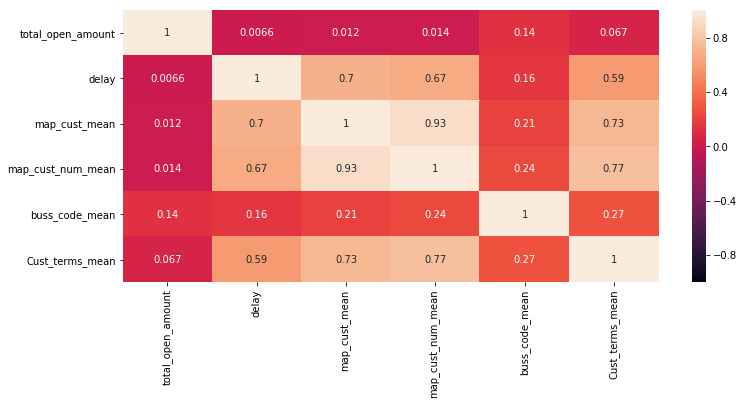

In [84]:
correlation = df_train.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1)

### Here we Check wrt which columns delay is related the maximum

In [85]:
correlation['delay'].sort_values(ascending=False)

delay                1.000000
map_cust_mean        0.702744
map_cust_num_mean    0.667766
Cust_terms_mean      0.592180
buss_code_mean       0.160188
total_open_amount    0.006562
Name: delay, dtype: float64

#### Here we check  week of and the day  of document creation to see if it helps us in any way

In [86]:
df_train['weekday_doc_cre']=df_train['document_create_date.1'].dt.dayofweek #Day of week in which document was created

In [87]:
df_train['month_day_doc_cre']=df_train['document_create_date.1'].dt.day #Month day in which document got created 

In [88]:
weekdoc=df_train.groupby("weekday_doc_cre")['delay'].mean().to_dict() #We perform groupby operation on Day of week in which document was created and the delay associated with that Day of week and take the mean of delays on that day of week

In [89]:
monthdoc=df_train.groupby("month_day_doc_cre")['delay'].mean().to_dict() 

#### Month day and week day

In [90]:
df_train['wd']=df_train['weekday_doc_cre'].map(weekdoc) #week day column(using object weekdoc)

In [102]:
df_train['md']=df_train['month_day_doc_cre'].map(monthdoc) #month day column(using object monthdoc)

#### Checking Co-relation Again  after adding new features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

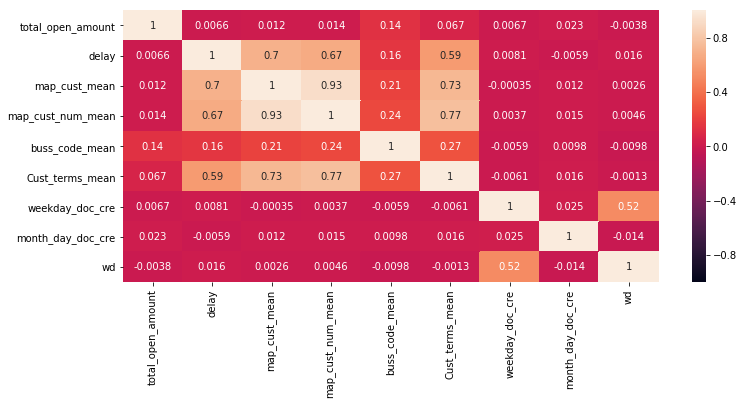

In [91]:
correlation = df_train.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1)

In [92]:
correlation['delay'].sort_values(ascending=False)

delay                1.000000
map_cust_mean        0.702744
map_cust_num_mean    0.667766
Cust_terms_mean      0.592180
buss_code_mean       0.160188
wd                   0.015591
weekday_doc_cre      0.008144
total_open_amount    0.006562
month_day_doc_cre   -0.005897
Name: delay, dtype: float64

In [93]:
df_train.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,map_cust_mean,map_cust_num_mean,buss_code_mean,Cust_terms_mean,weekday_doc_cre,month_day_doc_cre,wd
14405,U001,0200769623,WAL-MAR foundation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,31886.14,2018-12-30,NAH4,-4,-1.982074,-2.041731,0.497985,-1.714654,6,30,0.892112
34210,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,10357.32,2018-12-30,NAH4,-3,-1.941330,-2.041731,0.497985,-1.714654,6,30,0.892112
5752,U001,0200769623,WAL-MAR us,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,16358.52,2018-12-30,NAH4,1,-2.011524,-2.041731,0.497985,-1.714654,6,30,0.892112
5011,U001,0200726979,BJ'S systems,2019-01-22,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,16515.44,2018-12-30,NAA8,8,0.960630,0.926145,0.497985,1.366145,6,30,0.892112
15869,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,11025.27,2018-12-30,NAH4,-5,-2.156969,-2.041731,0.497985,-1.714654,6,30,0.892112


In [94]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

### Random Forest 

In [95]:
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_Regressor',RandomForestRegressor())])

### Decision Tree

In [96]:
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_Regressor',DecisionTreeRegressor())])

### Linear Regression

In [97]:
LinearRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LinearRegression())])

In [98]:
#Store pipeline in a list
pipeline = [LinearRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [ ]:
#Checking Performance of Model
accuracy=0.0
classifier=0
pipeline=""

In [99]:
PipelineDict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest'}

In [103]:
y_train=df_train["delay"]
df_train=df_train[['Cust_terms_mean','map_cust_mean','wd','md']]

### Validation set

In [104]:
df_val['map_cust_mean']=df_val['name_customer'].map(map_cust)
df_val['Cust_terms_mean']=df_val['cust_payment_terms'].map(map_terms)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
df_val.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
delay                     False
map_cust_mean              True
Cust_terms_mean            True
dtype: bool

In [106]:
df_val = df_val.dropna(axis=0, subset=["map_cust_mean"])
df_val = df_val.dropna(axis=0, subset=["Cust_terms_mean"])

In [107]:
val1=df_val

In [108]:
df_val['weekday_doc_cre']=df_val['document_create_date.1'].dt.dayofweek
df_val['month_day_doc_cre']=df_val['document_create_date.1'].dt.day

In [109]:
df_val['wd']=df_val['weekday_doc_cre'].map(weekdoc)
df_val['md']=df_val['month_day_doc_cre'].map(monthdoc)

##### y_val 

In [110]:
y_val=df_val["delay"]
df_val=df_val[['Cust_terms_mean','map_cust_mean','wd','md']]

In [111]:
df_val.shape

(4815, 4)

In [114]:
df_val.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 36446 to 901
Data columns (total 4 columns):
Cust_terms_mean    4815 non-null float64
map_cust_mean      4815 non-null float64
wd                 4815 non-null float64
md                 4815 non-null float64
dtypes: float64(4)
memory usage: 188.1 KB


In [115]:
df_val.head()

,Cust_terms_mean,map_cust_mean,wd,md
36446,1.366145,1.333333,0.892112,0.9869
34720,1.366145,-3.760000,0.892112,0.9869
23853,-1.714654,-1.842818,0.892112,0.9869
6839,-1.714654,-1.842818,0.892112,0.9869
11015,1.366145,0.702479,0.892112,0.9869


In [116]:
df_val.shape

(4815, 4)

In [117]:
y_val.shape

(4815,)

In [118]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35886 entries, 14405 to 35161
Data columns (total 4 columns):
Cust_terms_mean    35886 non-null float64
map_cust_mean      35886 non-null float64
wd                 35886 non-null float64
md                 35886 non-null float64
dtypes: float64(4)
memory usage: 1.4 MB


In [119]:
df_train=df_train.round(3) 
df_val=df_val.round(3)

In [120]:
df_train.isnull().any()

Cust_terms_mean    False
map_cust_mean      False
wd                 False
md                 False
dtype: bool

In [121]:
df_val.columns

Index(['Cust_terms_mean', 'map_cust_mean', 'wd', 'md'], dtype='object')

### Fit the pipelines

In [123]:

for mypipe in pipeline:
    mypipe.fit(df_train, y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [156]:
for i,model in enumerate(pipeline):
    print("{} Validation Accuracy: {}".format(PipelineDict[i],model.score(df_val,y_val)))

Linear Regression Validation Accuracy: 0.3792184972484811
Decision Tree Validation Accuracy: -0.2548664974750918
Random Forest Validation Accuracy: 0.14557849273572465


### Linear Regression

In [125]:
reg=LinearRegression()
reg = LinearRegression()
reg.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
pre=reg.predict(df_val)
pre=np.ceil(pre)
pre=pre.astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted Y')

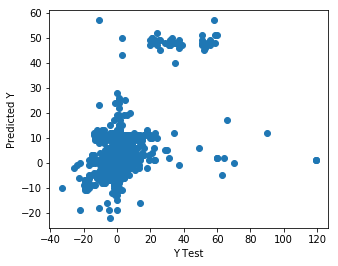

In [127]:
plt.scatter(y_val,pre)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean square Error is ",mean_squared_error(y_val, pre))
print("R2-Score is ",r2_score(y_val, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pre)))


Mean square Error is  37.50134994807892
R2-Score is  0.2963597809940517


<IPython.core.display.Javascript object>

RMSE: 6.1238345787650825


In [138]:
df_check=pd.DataFrame({'Actual':y_val,'Predicted':pre})
df_check.head(15)

<IPython.core.display.Javascript object>

,Actual,Predicted
36446,0,2
34720,1,-2
23853,-5,-2
6839,-5,-2
11015,0,1
34649,0,1
18102,0,5
2619,1,0
15606,0,1
17997,-5,-2


### Making Delay buckets

In [141]:
a=list(pre)
len(pre)


4815

In [142]:
b=[1]*4815

In [143]:
for i in a:
    if a[i]<=15:
        b[i]="Bucket-1"
    elif (a[i]>15 & a[i]<=30):
        b[i]="Bucket-2"
    elif (a[i]>30 & a[i]<=45):
        b[i]="Bucket-3"
    elif (a[i]>46 & a[i]<=60):
        b[i]="Bucket-4"
    else:
        b[i]="Bucket-5"

In [144]:
done=[]
for i in range(0,4815):
    x=val1['due_in_date'].iloc[i]+timedelta(int(a[i]))
    done.append(str(x.date()))

In [146]:
d = {'predicted_delay':a,'predicted_clear_date':done,'bucket':b}
buc = pd.DataFrame(d) 
buc.head(10)

<IPython.core.display.Javascript object>

,predicted_delay,predicted_clear_date,bucket
0,2,2019-11-27,Bucket-1
1,-2,2019-11-23,Bucket-1
2,-2,2019-11-23,Bucket-1
3,-2,2019-11-23,Bucket-1
4,1,2019-11-26,Bucket-1
5,1,2019-11-26,Bucket-1
6,5,2019-11-30,Bucket-1
7,0,2019-11-25,Bucket-1
8,1,2019-11-26,Bucket-1
9,-2,2019-11-23,Bucket-1


### Testing Set

In [147]:
df_test['map_cust_mean']=df_test['name_customer'].map(map_cust)
df_test['Cust_terms_mean']=df_test['cust_payment_terms'].map(map_terms)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Check For NULL

In [148]:
df_test.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
delay                     False
map_cust_mean              True
Cust_terms_mean            True
dtype: bool

In [149]:
df_test = df_test.dropna(axis=0, subset=["map_cust_mean"])
df_test= df_test.dropna(axis=0, subset=["Cust_terms_mean"])

In [150]:
df_test['weekday_doc_cre']=df_test['document_create_date.1'].dt.dayofweek
df_test['month_day_doc_cre']=df_test['document_create_date.1'].dt.day

In [151]:
df_test['wd']=df_test['weekday_doc_cre'].map(weekdoc)
df_test['md']=df_test['month_day_doc_cre'].map(monthdoc)

In [169]:
test1=df_test

In [153]:
y_test=df_test["delay"]
df_test=df_test[['Cust_terms_mean','map_cust_mean','wd','md']]

### Fit The Pipelines

In [155]:
for mypipe in pipeline:
    mypipe.fit(df_train, y_train)

### Check Accuracy

In [159]:

for i,model in enumerate(pipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(df_test,y_test)))

Linear Regression Test Accuracy: 0.45854231018038283
Decision Tree Test Accuracy: -0.051404163529715996
Random Forest Test Accuracy: 0.36067518809661037


#### LINEAR REGRESSION GIVES BEST PERFORMANCE

### Linear Regression

In [160]:
reg=LinearRegression()
reg = LinearRegression()
reg.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
p=reg.predict(df_test)
p=np.ceil(p)
p=p.astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted Y')

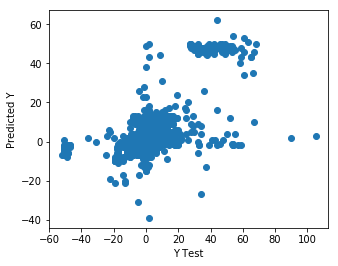

In [162]:
plt.scatter(y_test,p)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean square Error is ",mean_squared_error(y_test, p))
print("R2-Score is ",r2_score(y_test, p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p)))

Mean square Error is  56.47162022703819
R2-Score is  0.4244759236013991


<IPython.core.display.Javascript object>

RMSE: 7.514760157652285


In [182]:
df_check_test=pd.DataFrame({'Actual':y_test,'Predicted':p})
df_check_test.head(10)

<IPython.core.display.Javascript object>

,Actual,Predicted
10136,15,12
42361,0,2
42910,-2,-3
25315,5,4
39623,0,2
1269,-2,-9
24766,1,1
941,7,2
14941,-2,-5
33529,0,0


In [165]:
p=list(p)
len(p)

4845

In [166]:
q=[1]*4845
len(q)

4845

In [167]:
for i in p:
    if p[i]<=15:
        q[i]="Bucket-1"
    elif (p[i]>15 & p[i]<=30):
        q[i]="Bucket-2"
    elif (p[i]>30 & p[i]<=45):
        q[i]="Bucket-3"
    elif (p[i]>46 & p[i]<=60):
        q[i]="Bucket-4"
    else:
        q[i]="Bucket-5"

In [172]:
test1.columns

Index(['Cust_terms_mean', 'map_cust_mean', 'wd', 'md'], dtype='object')

In [180]:
buc[buc["bucket"]=="Bucket-1"].count()

predicted_delay         52
predicted_clear_date    52
bucket                  52
dtype: int64

### Prediction on untouched Data

In [218]:
untouch=untouched

In [219]:
print(untouch['invoice_id'].isna().value_counts())
print(untouch[untouch['clear_date']<untouch['document_create_date.1']].shape)
print(untouch[untouch['clear_date']<untouch['baseline_create_date']].shape)
print(untouch[untouch['due_in_date']<untouch['document_create_date.1']].shape)
print(untouch[untouch['due_in_date']<untouch['baseline_create_date']].shape)
print(untouch[untouch["total_open_amount"]==0].shape)

False    3853
Name: invoice_id, dtype: int64
(0, 19)
(0, 19)
(17, 19)
(0, 19)
(0, 19)


In [220]:
#Check For anamoly
untouch=untouch.drop(index=untouch[untouch['due_in_date']<untouch['document_create_date.1']].index)

In [221]:
untouch.shape

(3836, 19)

In [222]:
#As we will be performing operations like Sorting,Calculating delay and many other similar operation on dates later in this notebook so we convert all dates to datetime format
untouch['document_create_date']=pd.to_datetime(untouch['document_create_date'].astype('float'),format='%Y%m%d')
untouch['document_create_date.1']=pd.to_datetime(untouch['document_create_date.1'].astype('float'),format='%Y%m%d')
untouch['baseline_create_date']=pd.to_datetime(untouch['baseline_create_date'].astype('float'),format='%Y%m%d')
untouch['due_in_date']=pd.to_datetime(untouch['due_in_date'].astype('float'),format='%Y%m%d')
untouch.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46147,U013,0100031686,EWT-EU,NaN,2020.0,1.991840e+09,2020-04-04,2020-03-31,2020-04-04,2020-05-04,USD,RV,1.0,NaN,4730.54,2020-04-04,NAVE,1.991840e+09,1
46148,U001,0200743129,BROOKS corp,NaN,2020.0,1.930764e+09,2020-04-07,2020-04-08,2020-04-07,2020-04-22,USD,RV,1.0,NaN,58859.95,2020-04-07,NAA8,1.930764e+09,1
46149,U001,0200722444,PERFOR systems,NaN,2020.0,1.930653e+09,2020-03-16,2020-03-16,2020-03-16,2020-03-31,USD,RV,1.0,NaN,38790.20,2020-03-16,NAA8,1.930653e+09,1
46150,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930676e+09,2020-03-21,2020-03-20,2020-03-21,2020-04-05,USD,RV,1.0,NaN,9152.40,2020-03-21,NAH4,1.930676e+09,1
46151,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-04,2020-05-19,USD,RV,1.0,NaN,86831.85,2020-05-04,NAA8,1.930857e+09,1


In [223]:
untouch['weekday_doc_cre']=untouch['document_create_date.1'].dt.dayofweek
untouch['month_day_doc_cre']=untouch['document_create_date.1'].dt.day

In [224]:
untouch['wd']=untouch['weekday_doc_cre'].map(weekdoc)
untouch['md']=untouch['month_day_doc_cre'].map(monthdoc)

In [225]:
untouch['map_cust_mean']=untouch['name_customer'].map(map_cust)
untouch['Cust_terms_mean']=untouch['cust_payment_terms'].map(map_terms)

In [226]:
untouch.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,weekday_doc_cre,month_day_doc_cre,wd,md,map_cust_mean,Cust_terms_mean
46147,U013,0100031686,EWT-EU,NaN,2020.0,1.991840e+09,2020-04-04,2020-03-31,2020-04-04,2020-05-04,...,2020-04-04,NAVE,1.991840e+09,1,5,4,1.243306,1.197571,NaN,1.150000
46148,U001,0200743129,BROOKS corp,NaN,2020.0,1.930764e+09,2020-04-07,2020-04-08,2020-04-07,2020-04-22,...,2020-04-07,NAA8,1.930764e+09,1,1,7,0.874257,0.955294,1.500000,1.366145
46149,U001,0200722444,PERFOR systems,NaN,2020.0,1.930653e+09,2020-03-16,2020-03-16,2020-03-16,2020-03-31,...,2020-03-16,NAA8,1.930653e+09,1,0,16,0.959220,1.431267,-0.733333,1.366145
46150,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930676e+09,2020-03-21,2020-03-20,2020-03-21,2020-04-05,...,2020-03-21,NAH4,1.930676e+09,1,5,21,1.243306,0.288344,-1.842818,-1.714654
46151,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-04,2020-05-19,...,2020-05-04,NAA8,1.930857e+09,1,0,4,0.959220,1.197571,1.275862,1.366145


In [227]:
un1=untouch.copy()

In [228]:
un1=un1[['Cust_terms_mean','map_cust_mean','wd','md']]

In [229]:
un1.isnull().any()

Cust_terms_mean     True
map_cust_mean       True
wd                 False
md                 False
dtype: bool

In [230]:
un1['Cust_terms_mean'].fillna(un1['Cust_terms_mean'].mean(), inplace=True)
un1['map_cust_mean'].fillna(un1['map_cust_mean'].mean(), inplace=True)

In [231]:
un1.isnull().any()

Cust_terms_mean    False
map_cust_mean      False
wd                 False
md                 False
dtype: bool

In [232]:
un1.shape

(3836, 4)

In [233]:
un1.head()

,Cust_terms_mean,map_cust_mean,wd,md
46147,1.150000,0.124037,1.243306,1.197571
46148,1.366145,1.500000,0.874257,0.955294
46149,1.366145,-0.733333,0.959220,1.431267
46150,-1.714654,-1.842818,1.243306,0.288344
46151,1.366145,1.275862,0.959220,1.197571


### Linear Regression

In [234]:
re=LinearRegression()
re = LinearRegression()
re.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [235]:
p_final=re.predict(un1)
p_final=np.ceil(p_final)
p_final=p_final.astype(int)

<IPython.core.display.Javascript object>

In [236]:
predicted_delay=list(p_final)
len(predicted_delay)

3836

In [237]:
b=[1]*3836

In [238]:
#Bucketising the Delay
for i in predicted_delay:
    if predicted_delay[i]<=15:
        b[i]="Bucket-1"
    elif (predicted_delay[i]>15 & predicted_delay[i]<=30):
        b[i]="Bucket-2"
    elif (predicted_delay[i]>30 & predicted_delay[i]<=45):
        b[i]="Bucket-3"
    elif (predicted_delay[i]>46 & predicted_delay[i]<=60):
        b[i]="Bucket-4"
    else:
        b[i]="Bucket-5"

In [239]:
un.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,weekday_doc_cre,month_day_doc_cre,wd,md,map_cust_mean,Cust_terms_mean
46147,U013,0100031686,EWT-EU,NaN,2020.0,1.991840e+09,2020-04-04,2020-03-31,2020-04-04,2020-05-04,...,2020-04-04,NAVE,1.991840e+09,1,5,4,1.243306,1.197571,NaN,1.150000
46148,U001,0200743129,BROOKS corp,NaN,2020.0,1.930764e+09,2020-04-07,2020-04-08,2020-04-07,2020-04-22,...,2020-04-07,NAA8,1.930764e+09,1,1,7,0.874257,0.955294,1.500000,1.366145
46149,U001,0200722444,PERFOR systems,NaN,2020.0,1.930653e+09,2020-03-16,2020-03-16,2020-03-16,2020-03-31,...,2020-03-16,NAA8,1.930653e+09,1,0,16,0.959220,1.431267,-0.733333,1.366145
46150,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930676e+09,2020-03-21,2020-03-20,2020-03-21,2020-04-05,...,2020-03-21,NAH4,1.930676e+09,1,5,21,1.243306,0.288344,-1.842818,-1.714654
46151,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-04,2020-05-19,...,2020-05-04,NAA8,1.930857e+09,1,0,4,0.959220,1.197571,1.275862,1.366145


In [240]:
done=[]
for i in range(0,3836):
    x=un['due_in_date'].iloc[i]+timedelta(int(predicted_delay[i]))
    done.append(str(x.date()))

In [241]:
len(b)

3836

### Final Prediction on untouched Data

In [242]:
final = {'predicted_delay':predicted_delay,'predicted_clear_date':done,'bucket':b}
prediction = pd.DataFrame(final) 
prediction.head(15)

<IPython.core.display.Javascript object>

,predicted_delay,predicted_clear_date,bucket
0,1,2020-05-05,Bucket-1
1,2,2020-04-24,Bucket-1
2,0,2020-03-31,Bucket-1
3,-2,2020-04-03,Bucket-1
4,2,2020-05-21,Bucket-1
5,1,2020-04-10,Bucket-1
6,-2,2020-04-03,Bucket-1
7,5,2020-03-18,Bucket-1
8,-2,2020-05-18,Bucket-1
9,2,2020-04-16,Bucket-1
